In [18]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# Dataset on student admittance based on GRE, GPA and school's rank
# Dataset downloaded from "https://www.ats.ucla.edu/stat/data/binary.csv"

In [3]:
# Exploring and visualizing data
# Train and create a Logistic Regression model
# Evaluate model (Precision, F1 Score,...)
# Evaluate effect of decreasing number of features 

In [11]:
data = pd.read_csv('C:\\Users\\Ritesh Mohan Monga\\Documents\\Python-ML\\binary.csv')
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [12]:
# admit = 0 implies student not admitted
# admit = 1 implies student is admitted
# we have four ranks, 1 to 4
# build a model using gre, gpa and rank to predict admittance(admit)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [14]:
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


# Data Visualization

- Histogram of GPA

Text(0, 0.5, 'Number of students')

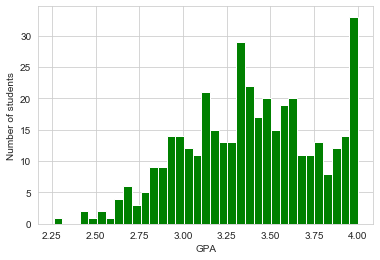

In [30]:
plt.hist(data['gpa'], bins = 35, color = 'green')
plt.xlabel('GPA')
plt.ylabel('Number of students')

- Histogram of GRE column

Text(0, 0.5, 'Number of students')

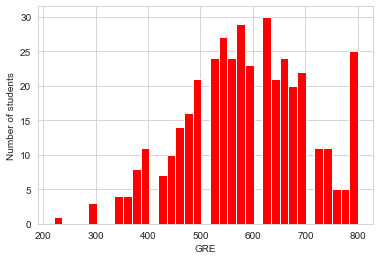

In [22]:
plt.hist(data['gre'], bins = 35, color = 'red')
plt.xlabel('GRE')
plt.ylabel('Number of students')

- Histogram of admittance

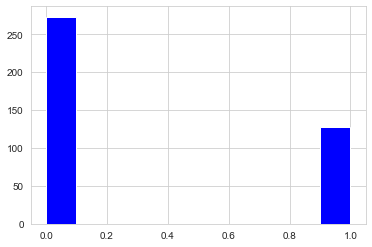

In [24]:
data['admit'].hist(color = "blue")

- Histogram of rank

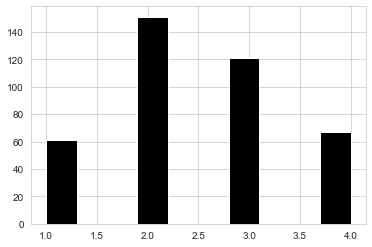

In [26]:
data['rank'].hist(color = 'black')

- Jointplot of GPA vs GRE

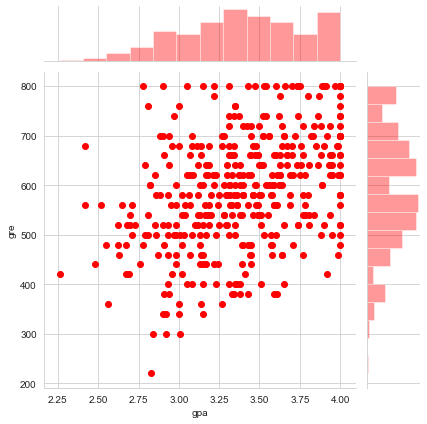

In [29]:
sns.jointplot(x = 'gpa', y = 'gre', data = data, color = 'red')


In [31]:
# converting rank to a useable format using get_dummies
dummy_ranks = pd.get_dummies(data['rank'], prefix = 'rank')

In [33]:
dummy_ranks.head()

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [34]:
columns_needed = ['admit', 'gre', 'gpa']

In [52]:
data = data[columns_needed].join(dummy_ranks.iloc[:, 1:])

In [53]:
data.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


The dataframe 'data' is now suitable to train and test our logistic regression model.

# Building our Logistic Regression Model

In [60]:
from sklearn.model_selection import train_test_split

In [81]:
X = data[['gre', 'gpa', 'rank_2', 'rank_3', 'rank_4']] #features
y = data['admit'] # target

In [62]:
# splitting data for training(70%) and testing(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

In [63]:
from sklearn.linear_model import LogisticRegression

In [65]:
model = LogisticRegression()

In [66]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
model.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
prediction = model.predict(X_test)

In [69]:
# Classification report
from sklearn.metrics import classification_report

In [71]:
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        88
           1       0.50      0.28      0.36        32

    accuracy                           0.73       120
   macro avg       0.64      0.59      0.60       120
weighted avg       0.70      0.73      0.71       120



Observations

- These are low scores.
- 'precision' is the ability of the classifier not to label as positive a sample that is negative = 70%
- 'recall' is the ability of the classifier to find all the positive samples = 73%
- 'f1 score' can be interpreted as a weighted harmonic mean of precision and recall = 71%


# Building a model using only gre and gpa as features

In [72]:
data.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [74]:
X = data[['gre', 'gpa']]
y = data['admit']

In [75]:
# splitting data for training(70%) and testing(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

In [76]:
model2 = LogisticRegression()

In [77]:
model2.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
prediction2 = model2.predict(X_test)

In [80]:
print (classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        88
           1       0.00      0.00      0.00        32

    accuracy                           0.73       120
   macro avg       0.37      0.50      0.42       120
weighted avg       0.54      0.73      0.62       120



D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Observations
- precision = 54%
- recall = 73%
- f1 score = 62%

Based on the classification reports of the two models, it can be said that all three columns(gre, gpa, rank) are important in predicting the student admittance. Therefore, model1 does a better job than model2.
